### Some History 
The Karhunen-Loeve Transform (KLT) is an advanced algorithm that achieves important milestones in both noise filtering and data compression. In a data compression setting, the transform is optimal in terms of minimizing the total differential entropy and consequently the bound on the bit rate. Although it is considered to be the most optimal transform for data compression known from an information theory point of view, its intensive computations have discouraged its application to real-world situations (a crucial step in KLT requires an $O(n^2)$ computation while its main competitor, Fast Fourier Transforms, incur a computational burden of $O(n\ln (n))$). Nevertheless, there is much optimism surrounding the KLT, especially in the extraction of weak signals from thick noise, which in a largely reductive sense is the primary aim of SETI.



### From signal to matrix

Given a real-time signal $x(t)$, it may be considered a random process and $N$ samples of it $x_n$ for $n = 1, 2, \dots, N$ may be combined to create a random vector

$$\textbf{x} = [x_1, x_2, \dots ,x_N]^T.$$

The **mean vector** of **x** can be computed from applying the expectation operator component-wise: 

$$\textbf{m}_x = \mathbb{E}(\textbf{x}) = [\mathbb{E}(x_1), \mathbb{E}(x_2), \dots, \mathbb{E}(x_N)]^T = [ \mu _1, \mu _2, \dots, \mu _N]^T.$$

The **covariance matrix** is then defined by 

$$\Sigma _x = \mathbb{E}(\textbf{x} - \textbf{m}_x)(\textbf{x} - \textbf{m}_x)^{T}] = \mathbb{E} (\textbf{x}\textbf{x}^{T}) - \textbf{m}_x \textbf{m}_x ^{T}.$$

However, note that because [neither correlation nor covariance are affected by a non-zero mean for random variables](https://stats.stackexchange.com/a/391840), we can assume that henceforth, all random variables are zero-mean. In practice, if the mean is non-zero, it can be removed from data during pre-processing. Additionally, because the covariance of two random variables $x_i$ and $x_j$ is defined as 

$$\mathbb{E}(x_i x_j) = \begin{cases}0 & i \neq j \\ \sigma_i^2 & i = j \end{cases},$$

the covariance matrix from above is a diagonal matrix 

$$\Sigma_x = \begin{bmatrix}\sigma_{11}^2 &  &  & \\ & \ddots & & \\ & & \sigma _{ij} ^2 & \\ & & & \ddots & \\ & & & & \sigma_{NN}^2 \end{bmatrix} = \text{diag}(\sigma_{11}^2, \sigma_{22}^2, \dots, \sigma_{NN}^2). $$


### The Discrete Karhunen-Loeve Transform 

Gven a $N \times N$ covariance matrix $\Sigma _x$, we can consider eigenvectors $\phi _k$ corresponding to the $k$th eigenvalue $\lambda _k$: 

$$\Sigma _x \phi _k = \lambda _k \phi _k, \, k = 1, 2, \dots, N. $$

Because the covariance matrix is symmetric, the eigenvectors are orthogonal: 

$$\langle \phi _i, \phi _j \rangle = \phi _i ^T \phi _j = \begin{cases}1 & i = j \\ 0 & i \neq j \end{cases} $$

and thus we can construct an $N \times N$ orthogonal matrix $\Phi$ 

$$\Phi = \begin{bmatrix}
    \vert & \vert &  & \vert \\ 
    \phi _1 & \phi_2 & \cdots & \phi _N \\
    \vert & \vert &  & \vert
\end{bmatrix} \implies \Sigma _x \Phi = \Phi \Lambda$$

where $\Lambda = \text{diag} (\lambda_1, \lambda_2, \dots, \lambda_N).$ Therefore, $\Sigma _x$ can be diagonalized as 

$$\Phi ^T \Sigma _x \Phi = \Phi ^{-1} \Sigma _x \Phi = \Phi ^{-1} \Phi \Lambda = \Lambda.$$

Given the signal vector, we define an orthogonal **Karhunen-Loeve Transform** (KLT) of $\textbf{x}$ as 

$$\textbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} = \Phi ^T \textbf{x} = \begin{bmatrix} \phi _1 ^T \\ \vdots \\ \phi_N^T \end{bmatrix} \textbf{x}= \begin{bmatrix} \phi _1 ^T \\ \vdots \\ \phi_N^T \end{bmatrix} \begin{bmatrix} x_1 \\ \vdots \\ x_N \end{bmatrix}.$$

The $i$th component of the transform vector $y_i$ is the projection of $\textbf{x}$ onto $\phi _i$ as 

$$y_i = \langle \phi _i, \textbf{x} \rangle = \phi _i ^T \textbf{x}. $$

#### The Inverse Transform 

Because $\Phi$ from above is orthrogonal, the inverse transform is easily obtained by left-multiplying by $\Phi$ in the transform equation. Observe that 

$$\textbf{x} = \Phi \textbf{y} =  \begin{bmatrix}
    \vert & \vert &  & \vert \\ 
    \phi _1 & \phi_2 & \cdots & \phi _N \\
    \vert & \vert &  & \vert
\end{bmatrix} \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} = \sum _{i =1} ^N y_i \phi _i.$$ 


### From images to matrices 
Suppose we are given a set of $N$ images, each of which consists of $r$ rows and $c$ columns. Each one of these images can be collapsed into a single $K = rc$ dimensional vector $\textbf{x}_{c_i}$ by concatenating the columns. Therefore, the set of images can be represented by a single $K \times N$ matrix $X$ where each of its columns is one of the $N$ images: 

$$X = 
\begin{bmatrix}
    \vert & \vert &  & \vert \\ 
    \textbf{x}_{c_1} & \textbf{x}_{c_2} & \cdots & \textbf{x}_{c_N} \\
    \vert & \vert &  & \vert
\end{bmatrix} = 
\begin{bmatrix} 
     \textbf{x}_{r_1}^T  \\ 
    \vdots  \\ 
    \textbf{x}_{r_K}^T \\ 
\end{bmatrix}
.
$$

Here, $\textbf{x}_{c_i}$ is a $K$-dimensional vector containing all $K$ pixels of the $i$th image while $\textbf{x}_{r_j}^T$ is an $N$-dimensional row vector containing the pixels at the same position for all $N$ images. Recall that because the intention of these sorts of transform is to reduce the dimensionality of the problem (in this case, compress the information), depending on the situation, we may want to consider either the column or row vectors as samples of a random vector. See the appendix for a proof that regardless of the choice, the underlying problem that the KLT will be solving and the outcome will be the same. The difference lies in the estimated covariance matrix. 

If the rows $\textbf{x}_{r_i}$ for $i = 1, 2, \dots, K$ are treated as $K$ realizations of an $N$ dimensional vector $\textbf{x}_r$, its covariance matrix can be estimated by 
$$\Sigma _r = \frac{1}{K} \sum ^K _{i = 1} \textbf{x}_{r_i} \textbf{x}_{r_i} ^T = \frac{1}{K} [x_{r_1}, x_{r_2}, \dots ,x_{r_K}] \begin{bmatrix} x^T _{r_1} \\ \vdots \\ x^T _{r_K} \end{bmatrix}  = \frac{1}{K} (X^T X).$$
This gives a symmetric, positive semi-definite $N \times N$ matrix. 

On the other hand, if the columns $\textbf{x}_{c_j}$ for $j = 1, 2, \dots, N$ are treated as $N$ realizations of a $K$ dimensional vector $\textbf{x}_c$, its covariance matrix can be estimated by 
$$\Sigma _c = \frac{1}{N} \sum ^N _{i = 1} \textbf{x}_{c_i} \textbf{x}_{c_i} ^T = \frac{1}{N} [x_{c_1}, x_{c_2}, \dots ,x_{c_N}] \begin{bmatrix} x^T _{c_1} \\ \vdots \\ x^T _{c_N} \end{bmatrix}  = \frac{1}{N} (X X^T).$$
This gives a symmetric, positive semi-definite $K \times K$ matrix. 

As in other basis transforms, such as SVD, most of the energy/information of the $N$ images is concentrated in the first few eigen-images corresponding to the greatest eigenvalues. The rest of the eigen-images can be removed without a substantial loss of energy/information. 


### Computing the transform for images

As stated in the previous section, we must consider two different ways of computing the KLT for a particular image. From the appendix, the eigenvalue problem associated with the two covariance matrices above are equivalent in the sense that they obtain the same non-zero eigenvalues. Therefore, the eigenvalue problem for either of the two matrices can be solved, depending on which has lower dimension. Indeed, this dimensionality reduction is the main appeal of transformation methods such as KLT and SVD. 

##### Taking rows as realizations 

Given the $N \times N$ covariance matrix $\Sigma_r$ in the situation that the rows of $X$ are treated as $K$ realizations of an $N$ dimensional vector, the corresponding eigenvalue problem is 

$$\Sigma _r U = U \Lambda $$

where the scaling factor $1/K$ from before is dropped, $\Lambda = \text{diag} (\lambda_1, \lambda _2, \dots, \lambda _N)$ is the diagonal eigenvalue matrix containing $n$ real non-negative eigenvalues that form an increasing chain 

$$\lambda _1 \geq \lambda _2 \geq \cdots \geq \lambda _n \geq 0 $$

and 

$$U = \begin{bmatrix} 
\vert & \vert &  & \vert \\ 
u_1 & u_2 & \cdots & u_N \\ 
\vert & \vert &  & \vert
\end{bmatrix}$$

is the orthogonal eigenvector matrix for $\Sigma _r$. The KLT can be performed on each of the $K$ row vectors of $X$ such that 

$$\textbf{y}_{r_i} = U^T \textbf{x}_{r_i} \implies Y^T = U^T X^T \implies Y = XU. $$


The following is a toy example and implementation for a column-based approach to KLT. As can be seen, the compression works well and is easily reversible. However, as has been shown in other research, this approach is much more computationally intensive than its competitors, such as FFT and SVD, when it comes to compression, and is consequently not mainstream. The remarkableness of KLT lies in its generality for stochastic processes, not so much its image compression capabilities. 

In [101]:
import numpy as np 
from numpy import asarray
from PIL import Image
from matplotlib import pyplot as plt

# keeping true to the formulas above, we compute the covariance by hand
# an alternative, using numpy's .cov() function is provided below 
def KLT_col_covariance(mat): 
    temp = np.matmul(mat, mat.T)
    temp = 1/mat.shape[0] * temp 
    val, vec = np.linalg.eig(temp)
    klt = np.dot(vec, mat) 
    return klt, vec, val 

# note that np.cov() interprets each row as a variable and each column a single observation of each of the variables
# in other words, the default for np.cov() places us in the second case from above
def KLT_col(a): 
    val, vec = np.linalg.eig(np.cov(a)) # returns eigenvalues and eigenvectors of the covariance matrix as numpy array
    # importantly, vec is an MxM matrix consisting of the eigenvectors in the columns; vec is the Phi matrix from the earlier discussion 
    klt = np.dot(vec, a)
    return klt, vec, val 

def KLT_row(a): 
    #  tell np.cov() to consider each column as a variable, with observations in the rows by setting rowvar=False 
    val, vec = np.linalg.eig(np.cov(a, rowvar=False))
    klt = np.dot(vec,a.T)
    return klt, vec, val 

def KLT_col_inv(transformed, eigenvecs):
    return np.dot(transformed.T, eigenvecs).T

def KLT_row_inv(transformed, eigenvecs):
    return np.dot(eigenvecs, transformed).T


In [96]:

a = np.array([[5,3,3],[3,3,3]])
kk, m, val = KLT_col(a)
klt2, m2, val2 = KLT_col_covariance(a) 
print("Using columns")
print(KLT_col_inv(kk, m))
print(KLT_col_inv(klt2, m2))
print("=======")
print("Using rows")
kkc, mc, valc = KLT_row(a)
print(KLT_row_inv(kkc, mc))


Using columns
[[5. 3. 3.]
 [3. 3. 3.]]
[[5. 3. 3.]
 [3. 3. 3.]]
Using rows
[[5. 3. 3.]
 [3. 3. 3.]]


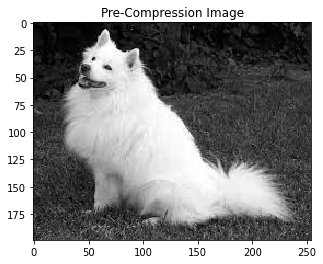

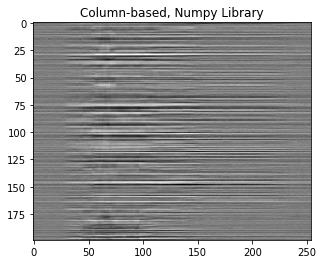

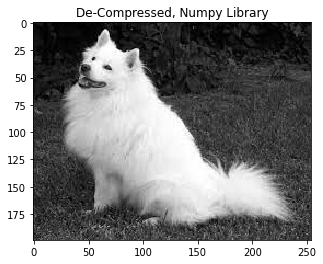

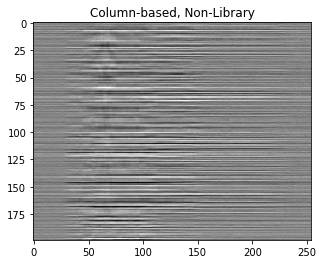

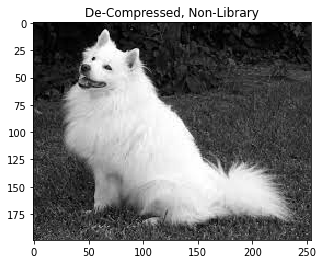

In [117]:
image = Image.open('dog.jpg')
data = asarray(image)
X = np.mean(data, -1); #convert to grayscale; currently does not support third color dimension for matrices 

imk, ime, imval = KLT_col(X)
imk2, ime2, imval2 = KLT_col_covariance(X)
imk3 , ime3, imval3 = KLT_row(X)

plt.gray()

plt.imshow(X, interpolation='nearest')
plt.title('Pre-Compression Image')
plt.show()

plt.imshow(imk, interpolation='nearest')
plt.title('Column-based, Numpy Library')
plt.show()

ret = KLT_col_inv(imk, ime)
plt.imshow(ret, interpolation='nearest')
plt.title('De-Compressed, Numpy Library')
plt.show() 

plt.imshow(imk2, interpolation='nearest')
plt.title('Column-based, Non-Library')
plt.show()

ret2 = KLT_col_inv(imk2, ime2)
plt.imshow(ret2, interpolation='nearest')
plt.title('De-Compressed, Non-Library')
plt.show() 
